# Import Required Libraries

In [62]:
# For Data Preprocessing and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning and Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# For Deep Learning (RNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


# Loading the CSV Files

In [63]:
import pandas as pd
# Load the CSV files you uploaded
building_data = pd.read_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB.csv')
carbon_intensity_data = pd.read_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB\carbon_intensity.csv')
pricing_data = pd.read_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB\pricing.csv')
weather_data = pd.read_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB\weather.csv')
# Display the first few rows of each dataset to ensure they are loaded correctly
print("Building Data:")
print(building_data.head())
print("Carbon Intensity Data:")
print(carbon_intensity_data.head())
print("Pricing Data:")
print(pricing_data.head())
print("Weather Data:")
print(weather_data.head())

Building Data:
   month  hour  day_type  daylight_savings_status  \
0      6     1         2                        0   
1      6     2         2                        0   
2      6     3         2                        0   
3      6     4         2                        0   
4      6     5         2                        0   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                    24.140535                                  -0.303909   
1                    23.777792                                  -0.666652   
2                    23.487175                                  -0.957269   
3                    23.285877                                  -1.158567   
4                    22.968086                                  -1.476357   

   indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                 73.127610            0.423079         0.0             0.0   
1                 74.936005            0.4200

# Merging the Files

In [64]:
# Merge the datasets based on 'hour' column
merged_data = building_data.merge(carbon_intensity_data, left_on='hour', right_index=True, how='inner')\
                            .merge(pricing_data, left_on='hour', right_index=True, how='inner')\
                            .merge(weather_data, left_on='hour', right_index=True, how='inner')

# Display the merged data to check the result
print("Merged Data:")
print(merged_data.head())

# Save the merged dataset into a new CSV file
merged_data.to_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB\merged_data.csv', index=False)

print("Merged dataset saved as 'merged_data.csv'")


Merged Data:
    month  hour  day_type  daylight_savings_status  \
0       6     1         2                        0   
24      6     1         3                        0   
48      6     1         4                        0   
72      6     1         5                        0   
96      6     1         6                        0   

    indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                     24.140535                                  -0.303909   
24                    23.889217                                   0.000329   
48                    23.802101                                  -0.642343   
72                    23.133380                                  -1.311064   
96                    23.713486                                  -0.175402   

    indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                  73.127610            0.423079         0.0        0.000000   
24                 72.060844     

# Verifying the Merged Dataset

In [65]:
# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Display the missing values for each column
print("Missing Values in Merged Data:")
print(missing_values)

# Check the shape of the merged dataset (rows, columns)
print(f"Merged Data Shape: {merged_data.shape}")

# Compare the number of rows in the original datasets and the merged dataset
print(f"Original Building Data Rows: {building_data.shape[0]}")
print(f"Original Carbon Intensity Data Rows: {carbon_intensity_data.shape[0]}")
print(f"Original Pricing Data Rows: {pricing_data.shape[0]}")
print(f"Original Weather Data Rows: {weather_data.shape[0]}")

# Ensure no rows are lost during the merge (merge with 'inner' means rows with matching keys are kept)
print(f"Rows in Merged Dataset: {merged_data.shape[0]}")


Missing Values in Merged Data:
month                                            0
hour                                             0
day_type                                         0
daylight_savings_status                          0
indoor_dry_bulb_temperature                      0
average_unmet_cooling_setpoint_difference        0
indoor_relative_humidity                         0
non_shiftable_load                               0
dhw_demand                                       0
cooling_demand                                   0
heating_demand                                   0
solar_generation                                 0
occupant_count                                   0
indoor_dry_bulb_temperature_cooling_set_point    0
indoor_dry_bulb_temperature_heating_set_point    0
hvac_mode                                        0
carbon_intensity                                 0
electricity_pricing                              0
electricity_pricing_predicted_1                  0


# Finding the Correlation

Correlation Matrix:
                                                      month          hour  \
month                                          1.000000e+00 -6.727489e-16   
hour                                          -6.727489e-16  1.000000e+00   
day_type                                       6.820490e-03  1.577224e-16   
daylight_savings_status                                 NaN           NaN   
indoor_dry_bulb_temperature                    2.515881e-01 -8.816644e-02   
average_unmet_cooling_setpoint_difference      1.841734e-01  1.339358e-01   
indoor_relative_humidity                      -5.925245e-01 -5.134177e-02   
non_shiftable_load                            -8.197008e-03  2.017172e-01   
dhw_demand                                    -1.006085e-02  1.073477e-01   
cooling_demand                                 2.792009e-01  4.972869e-01   
heating_demand                                          NaN           NaN   
solar_generation                               1.015151e

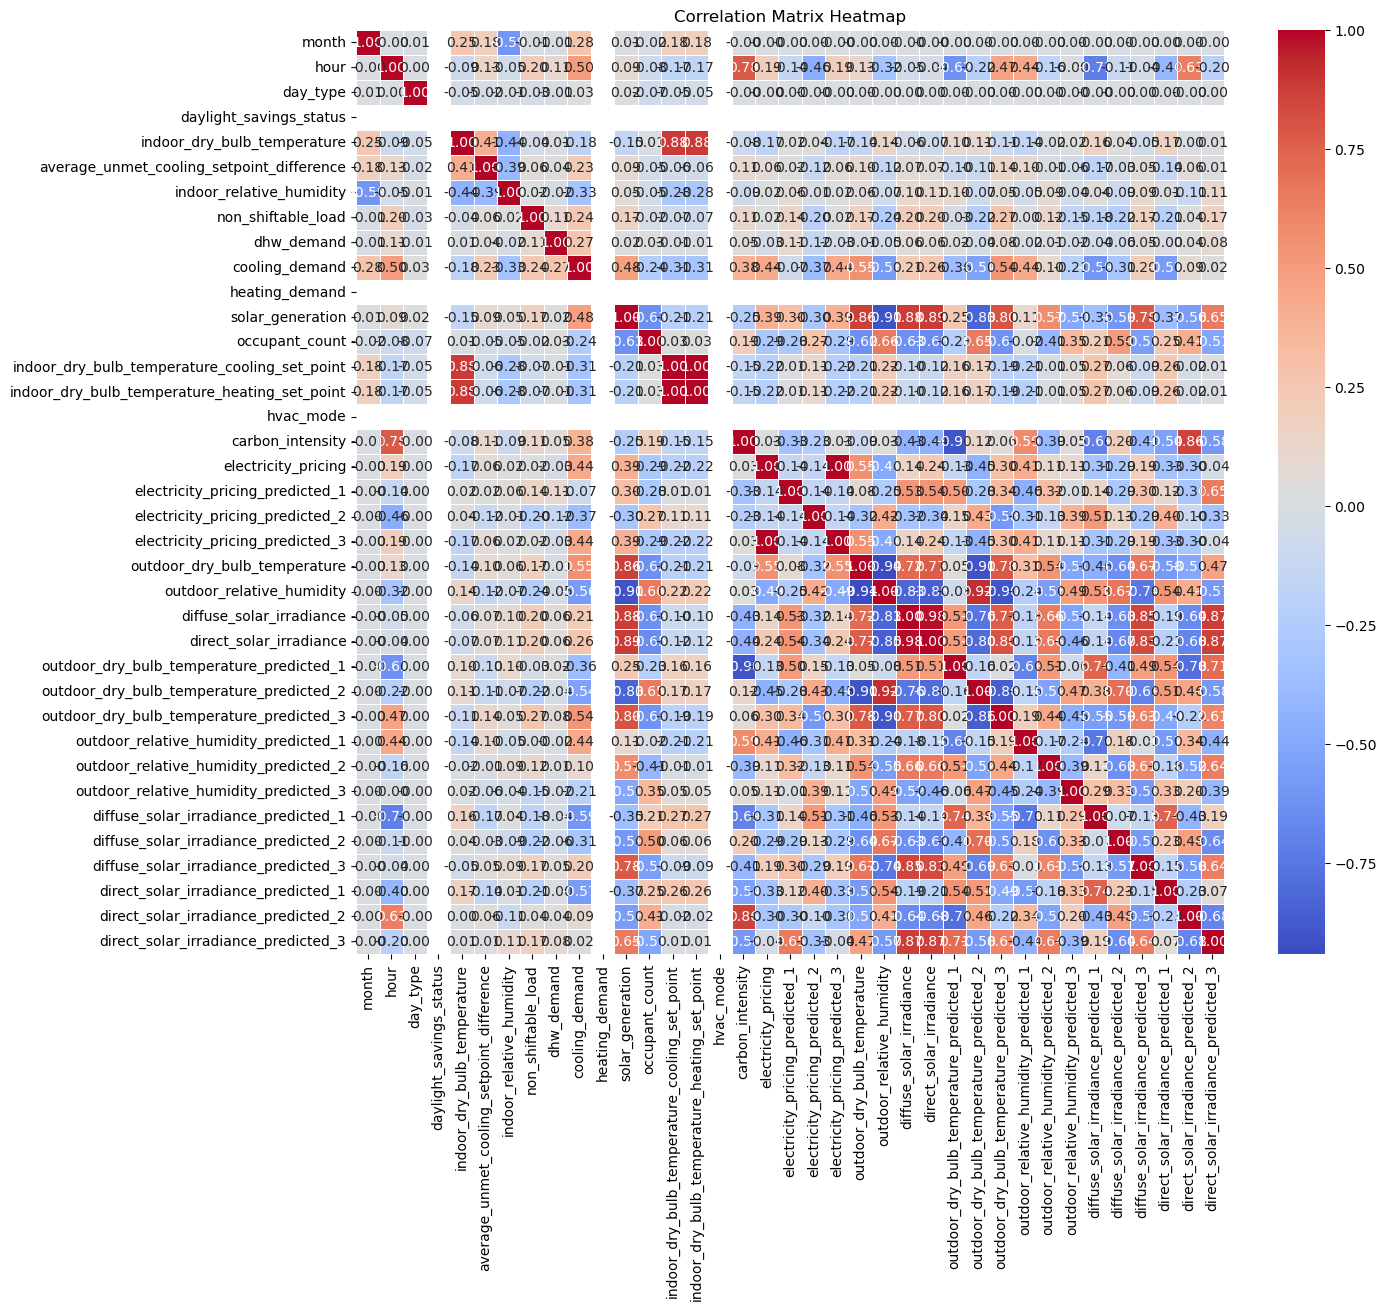

In [66]:
# Calculate the correlation matrix for the merged data
correlation_matrix = merged_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Preparing Data for Training and Testing

In [76]:
# Load the merged dataset
merged_data = pd.read_csv(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\OPEN ENDED LAB\merged_data.csv')

# Display the first few rows to check the data
print(merged_data.head())

# Drop the 'hour' column (or any other irrelevant columns for training)
data = merged_data.drop(columns=['hour'])

# Separate features and target variable (let's assume 'carbon_intensity' as the target)
X = data.drop(columns=['carbon_intensity'])  # Features
y = data['carbon_intensity']  # Target variable

# Normalize the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for time-series (time step = 10 as an example)
import numpy as np

def create_time_series_data(data, target, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(target[i+time_step])
    return np.array(X), np.array(y)

# Prepare the data with time steps
time_step = 10  # You can adjust this based on your dataset
X, y = create_time_series_data(X_scaled, y, time_step)

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


   month  hour  day_type  daylight_savings_status  \
0      6     1         2                        0   
1      6     1         3                        0   
2      6     1         4                        0   
3      6     1         5                        0   
4      6     1         6                        0   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                    24.140535                                  -0.303909   
1                    23.889217                                   0.000329   
2                    23.802101                                  -0.642343   
3                    23.133380                                  -1.311064   
4                    23.713486                                  -0.175402   

   indoor_relative_humidity  non_shiftable_load  dhw_demand  cooling_demand  \
0                 73.127610            0.423079         0.0        0.000000   
1                 72.060844            0.423079         0.0 

# Data Preprocessing

In [68]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

# Drop the 'hour' column and any other irrelevant columns for training
data = merged_data.drop(columns=['hour'])

# Separate features and target variable (assuming 'carbon_intensity' is the target)
X = data.drop(columns=['carbon_intensity'])  # Features
y = data['carbon_intensity']  # Target variable

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Function to create time-series data
def create_time_series_data(data, target, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(target[i+time_step])
    return np.array(X), np.array(y)

# Prepare the data with time steps
time_step = 10  # You can adjust this based on your dataset
X, y = create_time_series_data(X_scaled, y, time_step)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1538, 10, 35)
Validation data shape: (330, 10, 35)
Test data shape: (330, 10, 35)


# Model Using LSTM Architecture

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# Add the first LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add Dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Add the second LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=False))

# Add another Dropout layer
model.add(Dropout(0.2))

# Add the output layer (predicting a single value for regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model structure
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 100)           54400     
                                                                 
 dropout_7 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 84,651
Trainable params: 84,651
Non-trainable params: 0
_________________________________________________________________


# Training the Model

Epoch 1/100
25/25 [==============================] - 12s 173ms/step - loss: 0.0255 - val_loss: 0.0019
Epoch 2/100
25/25 [==============================] - 1s 59ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 3/100
25/25 [==============================] - 2s 60ms/step - loss: 0.0034 - val_loss: 9.7978e-04
Epoch 4/100
25/25 [==============================] - 2s 64ms/step - loss: 0.0026 - val_loss: 5.3648e-04
Epoch 5/100
25/25 [==============================] - 2s 64ms/step - loss: 0.0023 - val_loss: 6.7496e-04
Epoch 6/100
25/25 [==============================] - 2s 61ms/step - loss: 0.0021 - val_loss: 4.4250e-04
Epoch 7/100
25/25 [==============================] - 2s 63ms/step - loss: 0.0018 - val_loss: 4.5812e-04
Epoch 8/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0019 - val_loss: 2.3189e-04
Epoch 9/100
25/25 [==============================] - 2s 65ms/step - loss: 0.0022 - val_loss: 2.1169e-04
Epoch 10/100
25/25 [==============================] - 2s 65ms/step - l

25/25 [==============================] - 2s 61ms/step - loss: 4.2854e-04 - val_loss: 0.0012
Epoch 79/100
25/25 [==============================] - 2s 61ms/step - loss: 4.3339e-04 - val_loss: 0.0011
Epoch 80/100
25/25 [==============================] - 2s 60ms/step - loss: 3.9537e-04 - val_loss: 7.8867e-04
Epoch 81/100
25/25 [==============================] - 1s 58ms/step - loss: 4.1587e-04 - val_loss: 0.0011
Epoch 82/100
25/25 [==============================] - 2s 61ms/step - loss: 3.8276e-04 - val_loss: 9.7298e-04
Epoch 83/100
25/25 [==============================] - 2s 61ms/step - loss: 3.8492e-04 - val_loss: 0.0011
Epoch 84/100
25/25 [==============================] - 1s 60ms/step - loss: 3.7745e-04 - val_loss: 0.0010
Epoch 85/100
25/25 [==============================] - 2s 61ms/step - loss: 3.7276e-04 - val_loss: 0.0012
Epoch 86/100
25/25 [==============================] - 1s 58ms/step - loss: 3.6262e-04 - val_loss: 8.7846e-04
Epoch 87/100
25/25 [==============================] - 2s

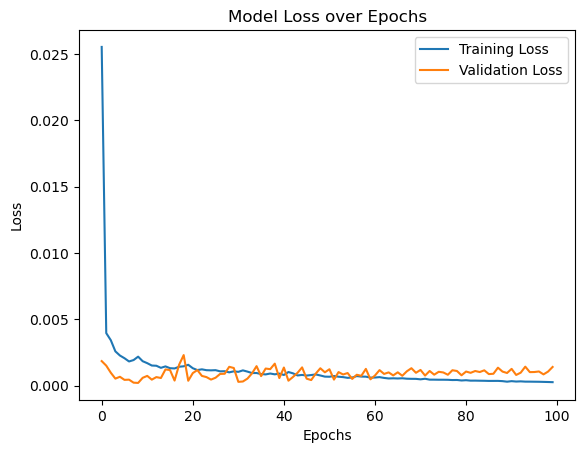

In [70]:
# Train the model with training data
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss over epochs to observe improvement
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluating the Model

In [75]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE: {mape}%")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae}")


11/11 [==============================] - 0s 14ms/step
RMSE: 0.033439188461887
MAPE: 6.740938823309406%
MAE: 0.03332973021166622
